In [1]:
from pymc3 import *
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [ ]:
with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('Intercept', 0, sigma=20)
    x_coeff = Normal('x', 0, sigma=20)

    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * x,
                        sigma=sigma, observed=y)

    # Inference!
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

In [ ]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.GLM.from_formula('y ~ x', data)
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

In [ ]:
from matplotlib.figure import Figure

fig = Figure()
traceplot(trace[100:])
fig = plt.gcf()
fig.savefig("img/test.png")

In [ ]:
tarr = pm.traceplot(trace)


In [ ]:
print(type(tarr))

In [ ]:
fig

In [ ]:
import io

In [ ]:
buf = io.BytesIO()

In [ ]:
buf

# Warping to a function

In [2]:
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt 



In [3]:
data = pd.read_csv("data/Advertising.csv")

In [4]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
# data = data.drop("Sales", axis=1)

In [6]:
X = data[["TV", "Radio", "Newspaper"]]

In [7]:
y = data['Sales']

In [8]:
label_col = ["TV", "Radio", "Newspaper"]
target_col = "Sales"

In [9]:
def linear_bayes(df, label_col, target_col, draw_sample=3000, chains=2):
    feature_list = df.columns
    feature_list = [i for i in feature_list if i != label_col]
    
    formula = str(target_col)+' ~ '+' + '.join(['%s' % variable for variable in label_col])
    
    with pm.Model() as normal_model:
        family = pm.glm.families.Normal()
        pm.GLM.from_formula(formula, data = df, family = family)
        normal_trace = pm.sample(draws=2000, chains=2, tune=500)
        
        plt.figure()
        # TODO modify figure size
        pm.traceplot(normal_trace[800:])
        plt.savefig("bayesian_regression_visualization.png")
        
        return normal_trace, plt
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, Newspaper, Radio, TV, Intercept]
Sampling 2 chains, 0 divergences: 100%|█████████████████| 5000/5000 [00:13<00:00, 378.24draws/s]
The acceptance probability does not match the target. It is 0.8841995963439364, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9179222864165378, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\Yiming.Yu\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Yiming.Yu\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backe

<Figure size 432x288 with 0 Axes>

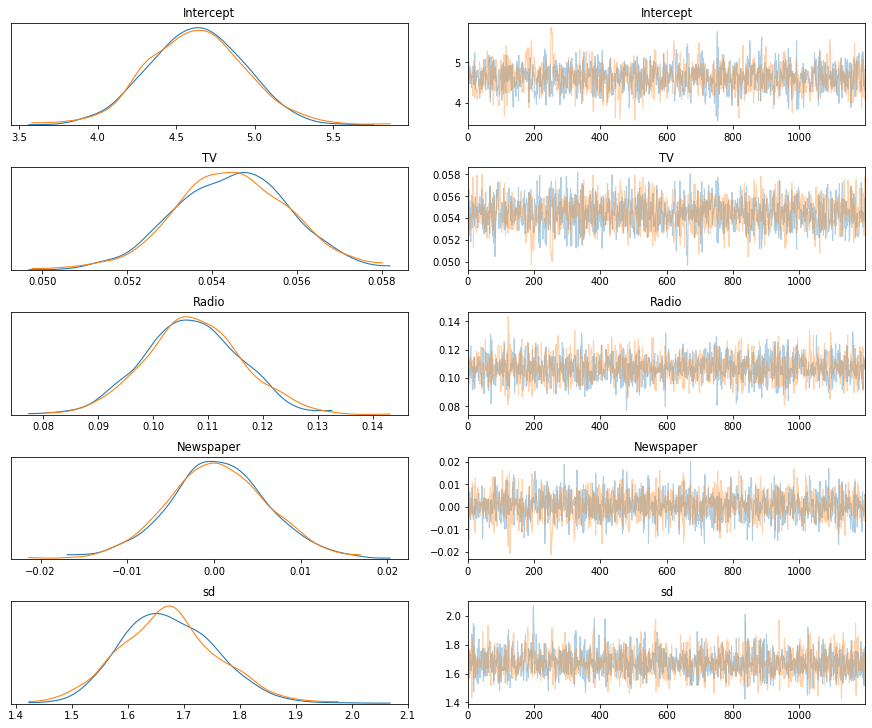

In [10]:
trace, plot = linear_bayes(data, label_col=label_col, target_col=target_col)

In [11]:
trace

<MultiTrace: 2 chains, 2000 iterations, 6 variables>

In [12]:
plot.tight_layout()

<Figure size 432x288 with 0 Axes>

In [13]:
np.array([trace[variable] for variable in trace.varnames])

array([[ 4.65653213e+00,  4.87406145e+00,  4.42301327e+00, ...,
         4.28990816e+00,  4.06791854e+00,  4.64202332e+00],
       [ 5.55453201e-02,  5.32078745e-02,  5.43346322e-02, ...,
         5.77447283e-02,  5.55090273e-02,  5.50650883e-02],
       [ 1.03692807e-01,  1.21443374e-01,  9.66560032e-02, ...,
         1.08045096e-01,  1.11025131e-01,  1.05560355e-01],
       [ 3.80816044e-03, -4.82446616e-03,  9.51634823e-03, ...,
         6.80600341e-04,  5.42959605e-03,  4.43907420e-03],
       [ 5.93356181e-01,  4.38863353e-01,  5.67803334e-01, ...,
         4.69995254e-01,  5.59979137e-01,  5.06992450e-01],
       [ 1.81005310e+00,  1.55094334e+00,  1.76438702e+00, ...,
         1.59998660e+00,  1.75063598e+00,  1.66029027e+00]])

In [14]:
pd.DataFrame(data=np.array([trace[variable] for variable in trace.varnames]))

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,4.656532,4.874061,4.423013,4.708698,4.662414,4.567443,4.896506,4.924396,4.938930,4.697050,...,4.635357,4.496463,5.076685,4.148625,4.771064,4.815024,4.829427,4.289908,4.067919,4.642023
1,0.055545,0.053208,0.054335,0.053116,0.053593,0.054817,0.054033,0.053193,0.054005,0.053853,...,0.054435,0.053748,0.053609,0.056294,0.054116,0.053274,0.052371,0.057745,0.055509,0.055065
2,0.103693,0.121443,0.096656,0.116548,0.113311,0.108409,0.097644,0.106898,0.105414,0.107117,...,0.119355,0.122124,0.091486,0.120593,0.107396,0.105773,0.112420,0.108045,0.111025,0.105560
3,0.003808,-0.004824,0.009516,-0.003522,0.001662,-0.000272,0.007283,-0.002883,-0.004608,-0.001246,...,-0.000381,-0.001884,-0.000302,-0.001054,-0.000513,-0.003269,-0.006506,0.000681,0.005430,0.004439
4,0.593356,0.438863,0.567803,0.511949,0.496081,0.463083,0.552323,0.498086,0.477785,0.547938,...,0.499277,0.475571,0.497026,0.570524,0.417188,0.438444,0.541207,0.469995,0.559979,0.506992
5,1.810053,1.550943,1.764387,1.668541,1.642273,1.588966,1.737284,1.645569,1.612499,1.729683,...,1.647530,1.608933,1.643826,1.769194,1.517687,1.550293,1.718079,1.599987,1.750636,1.660290


In [15]:
np.array([np.mean(trace[variable]) for variable in trace.varnames])

array([4.62387021e+00, 5.44624653e-02, 1.07241549e-01, 2.77254891e-04,
       5.13819536e-01, 1.67396409e+00])

In [ ]:
np.array([np.mean(trace[variable]) for variable in trace.varnames])

In [18]:
label_list = [i for i in data[label_col].columns]

In [19]:
label_list

['TV', 'Radio', 'Newspaper']

In [20]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,4.624,0.312,4.045,5.202,0.007,0.005,2247.0,2214.0,2279.0,1904.0,1.0
TV,0.054,0.001,0.052,0.057,0.000,0.000,2847.0,2847.0,2866.0,2096.0,1.0
Radio,0.107,0.009,0.091,0.123,0.000,0.000,2942.0,2942.0,2942.0,2484.0,1.0
Newspaper,0.000,0.006,-0.011,0.011,0.000,0.000,3376.0,1720.0,3376.0,2156.0,1.0
sd,1.674,0.088,1.510,1.835,0.002,0.001,3440.0,3386.0,3556.0,2484.0,1.0


In [27]:
coef_table = pm.summary(trace)

In [36]:
coef_table.T

,Intercept,TV,Radio,Newspaper,sd
mean,4.624,0.054,0.107,0.000,1.674
sd,0.312,0.001,0.009,0.006,0.088
hpd_3%,4.045,0.052,0.091,-0.011,1.510
hpd_97%,5.202,0.057,0.123,0.011,1.835
mcse_mean,0.007,0.000,0.000,0.000,0.002
mcse_sd,0.005,0.000,0.000,0.000,0.001
ess_mean,2247.000,2847.000,2942.000,3376.000,3440.000
ess_sd,2214.000,2847.000,2942.000,1720.000,3386.000
ess_bulk,2279.000,2866.000,2942.000,3376.000,3556.000
ess_tail,1904.000,2096.000,2484.000,2156.000,2484.000


In [34]:
coef_table.T.loc[['mean'], :]

,Intercept,TV,Radio,Newspaper,sd
mean,4.624,0.054,0.107,0.0,1.674


In [35]:
coef_table.T.iloc[0, :]

Intercept    4.624
TV           0.054
Radio        0.107
Newspaper    0.000
sd           1.674
Name: mean, dtype: float64

In [43]:
ddd = coef_table.T.loc[['mean'], :].to_dict('records')

In [44]:
ddd

[{'Intercept': 4.624,
  'TV': 0.054,
  'Radio': 0.107,
  'Newspaper': 0.0,
  'sd': 1.674}]

In [47]:
col = [{"name": i, "id": i} for i in coef_table.T.loc[['mean'], :].columns]

In [48]:
col

[{'name': 'Intercept', 'id': 'Intercept'},
 {'name': 'TV', 'id': 'TV'},
 {'name': 'Radio', 'id': 'Radio'},
 {'name': 'Newspaper', 'id': 'Newspaper'},
 {'name': 'sd', 'id': 'sd'}]

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression().fit(X, y)

In [25]:
lr.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [26]:
lr.intercept_

4.625124078808653

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
import re

In [ ]:
df_1 = df.rename(columns=lambda x: re.sub(r'\W+', '', x))

In [ ]:
df_1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
reg = LinearRegression().fit(df[label_col], df[target_col])

In [ ]:
pred_y = reg.predict(df[label_col])

In [ ]:
r2_score(df[target_col], pred_y)

In [ ]:
from sklearn.linear_model import ARDRegression, BayesianRidge
import pandas as pd

def bayes_linear_modeling(df, selected_col, target_col, model_option, alpha_1=0.005, lambda_1=0.005, alpha_2=0.005, lambda_2=0.005):
    """
    alpha_init, lambda_init can be set in sklearn==0.22, which can also impact the estimators
    posterior_mean = alpha/lambda in bayesian ridge
    alpha, lambda are shape parameter for Gamma distribution"""
    feature_list = df.columns
    feature_list = [i for i in feature_list if i != selected_col]
    
    if model_option == "Bayesian Ridge":
        clf = BayesianRidge(alpha_1=alpha_1, lambda_1=lambda_1, alpha_2=alpha_2, lambda_2=lambda_2, normalize=True).fit(df[selected_col], y)
        return clf.coef_
    elif model_option == "Bayesian Linear":
        # Using PyMC3
        formula = str(target_col)+' ~ '+' + '.join(['%s' % variable for variable in selected_col])

        with pm.Model() as normal_model:
            family = pm.glm.families.Normal()
            pm.GLM.from_formula(formula, data = df, family = family)
            normal_trace = pm.sample(draws=2000, chains=2, tune=500)
            
            return np.array([normal_trace[variable] for variable in normal_trace.varnames])